In [1]:
import tweepy
import pandas as pd
import numpy as np
import requests
import json
import io
from bs4 import BeautifulSoup
import os
import time
import re

## Gathering Data

In [2]:
# Download twitter archive
twit_arch = pd.read_csv("twitter-archive-enhanced.csv", encoding = 'utf-8')
#Side note: you can read a csv file by feeding the url straight in the function

In [3]:
twit_arch.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
# Get the image predictions
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)


In [5]:
# 'w' = open for writing, truncating the file first
with open ("image-predictions.tsv", mode = "wb") as file:
    file.write(response.content)


In [6]:
img_prd = pd.read_csv("image-predictions.tsv", sep = "\t", encoding='utf-8')

In [7]:
img_prd.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [8]:
consumer_key = '2FQsZO60YHkmsFgntDYUabRRL'
consumer_secret = 'yiOwYCLOpgntT7PD1uYzz2CFXMexftoiiLpw7l3yZy7BfLOVsV'
access_token = '1558878531085541378-aqNMLXr1PZt7QE5rgVKE6pRNnp1wfd'
access_secret = 'VIwg8xAlRUFp82I4oYrD7BK5PBInjgVO5m72S2W4u74v7'

#Create an OAuthHandler instance
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#API instance
api = tweepy.API(auth,
            parser = tweepy.parsers.JSONParser(),
            wait_on_rate_limit = True, wait_on_rate_limit_notify = True, compression=True)

In [9]:
#Create dicitonary to save data
tweet_data = []

#Keep track of errors
error_list=[]

for tweet_id in twit_arch['tweet_id']:

    try:
        #Return a single status specified by the ID parameter
        #Get the full untruncated Tweet text
        content = api.get_status(tweet_id, tweet_mode = 'extended')
        #Get time of tweet
        tweet_time = content['created_at']
        #Get retweet count
        tweet_retweet= content['retweet_count']
        #Get favorite count
        tweet_fav = content['favorite_count']
        #Get the amount of followers at time of tweet
        followers_count = content['user']['followers_count'] 
        #Get how many favorites the user had
        user_fav = content['user']['favourites_count']
        #Append the whole thing to dictionary
        tweet_data.append({'tweet_id': int(tweet_id),
                            'tweet_time' : pd.to_datetime(tweet_time),
                            'retweet' : int(tweet_retweet),
                            'favorites' : int(tweet_fav),
                            'user_fav' : int(user_fav)})
    except Exception as e :
                #In case of error add the tweet ID
                print(str(tweet_id)+ " " + str(e))
                error_list.append(tweet_id)

888202515573088257 [{u'message': u'No status found with that ID.', u'code': 144}]
873697596434513921 [{u'message': u'No status found with that ID.', u'code': 144}]
872668790621863937 [{u'message': u'No status found with that ID.', u'code': 144}]
872261713294495745 [{u'message': u'No status found with that ID.', u'code': 144}]
869988702071779329 [{u'message': u'No status found with that ID.', u'code': 144}]
866816280283807744 [{u'message': u'No status found with that ID.', u'code': 144}]
861769973181624320 [{u'message': u'No status found with that ID.', u'code': 144}]
856602993587888130 [{u'message': u'No status found with that ID.', u'code': 144}]
856330835276025856 [{u'message': u'No status found with that ID.', u'code': 144}]
851953902622658560 [{u'message': u'No status found with that ID.', u'code': 144}]
851861385021730816 [{u'message': u'No status found with that ID.', u'code': 144}]
845459076796616705 [{u'message': u'No status found with that ID.', u'code': 144}]
8447047884031139

In [10]:
#See length of successful results
print(len(tweet_data))

2327


In [11]:
#See number of erros
print(len(error_list))

29


In [12]:
                                                     
error_tweet = []

for e in error_list:
    try:
        #Get time of tweet
        tweet_time = content['created_at']
        #Get retweet count
        tweet_retweet= content['retweet_count']
        #Get favorite count
        tweet_fav = content['favorite_count']
        #Get the amount of followers at time of tweet
        followers_count = content['user']['followers_count'] 
        #Get how many favorites the user had
        user_fav = content['user']['favourites_count']
        #Append the whole thing to dictionary
        tweet_data.append({'tweet_id': int(tweet_id),
                            'tweet_time' : pd.to_datetime(tweet_time),
                            'retweet' : int(tweet_retweet),
                            'favorites' : int(tweet_fav), 
                            'user_fav' : int(user_fav)})
    except Exception:
            #In case of error add the tweet ID
        print(str(tweet_id)+ " " + str(e))
        error_tweet.append(e)

In [13]:
#Create the dataframe
json_tweets = pd.DataFrame(tweet_data, columns = ['tweet_id', 'retweet', 'favorites'])

In [14]:
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

## ASSESS

In [15]:
#make a copy json tweets
json_tweet =json_tweets.copy()

In [16]:
json_tweet.head(4)

,tweet_id,retweet,favorites
0,892420643555336193,6964,33674
1,892177421306343426,5269,29214
2,891815181378084864,3463,21963
3,891689557279858688,7190,36768


In [17]:
json_tweet.nunique()

tweet_id     2327
retweet      1646
favorites    1971
dtype: int64

In [18]:
json_tweet.describe()

,tweet_id,retweet,favorites
count,2.356000e+03,2356.000000,2356.000000
mean,7.408603e+17,2432.217742,6964.521222
std,6.829982e+16,4141.273862,10858.068074
min,6.660209e+17,1.000000,0.000000
25%,6.773114e+17,476.000000,1242.000000
50%,7.158433e+17,1122.000000,3007.000000
75%,7.976518e+17,2816.500000,8457.250000
max,8.924206e+17,70270.000000,144150.000000


In [19]:
#copy of the second archive
twit_arch_ = twit_arch.copy()

In [20]:
twit_arch_.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [21]:
twit_arch_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
#visualizing unique values in the whole dataset.
twit_arch_.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [23]:
twit_arch_.shape

(2356, 17)

In [24]:
#visualizing any unique values from tweet_id
twit_arch_['tweet_id'].nunique()

2356

In [25]:
twit_arch_.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
twit_arch_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

***Quality:***//

1-source is not only from twitter

2- retweeted_status_id	retweeted_status_user_id retweeted_status_timestamp shows whos have made a Rt (drop those clums)

3-Drop Retweets tweets.

4- Clean Urls not from twitter.

5- Find dogs names- the dog types should have NaN instead of None

6- Dogs type gathered ina column

7- change timestamp format into datetime.

8- Dog rating changed in a better and compacted view

##### Tidiness:

1-Merging of dog stages in 1 column.

2-Merging all 3 datasets into 1 final cleaned dataset.


In [27]:
img_prd_ = img_prd.copy()

In [28]:
img_prd_.head(60)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [29]:
img_prd_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [30]:
img_prd_.shape

(2075, 12)

In [31]:
img_prd_['tweet_id'].nunique()

2075

In [32]:
pd.options.display.float_format= '{:,.4f}'.format

In [33]:
img_prd_.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,"2,075.0000","2,075.0000","2,075.0000","2,075.0000","2,075.0000"
mean,"738,451,357,852,529,152.0000",1.2039,0.5945,0.1346,0.0603
std,"67,852,033,330,235,664.0000",0.5619,0.2712,0.1007,0.0509
min,"666,020,888,022,790,144.0000",1.0000,0.0443,0.0000,0.0000
25%,"676,483,507,139,540,992.0000",1.0000,0.3644,0.0539,0.0162
50%,"711,998,809,858,043,904.0000",1.0000,0.5882,0.1182,0.0494
75%,"793,203,448,525,178,880.0000",1.0000,0.8439,0.1956,0.0918
max,"892,420,643,555,336,192.0000",4.0000,1.0000,0.4880,0.2734


In [34]:
img_prd_['jpg_url'].nunique()

2009

***Quality***

9. drop duplicates tweets

In [35]:
json_tweet.head(5)

,tweet_id,retweet,favorites
0,892420643555336193,6964,33674
1,892177421306343426,5269,29214
2,891815181378084864,3463,21963
3,891689557279858688,7190,36768
4,891327558926688256,7710,35161


In [36]:
json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id     2356 non-null int64
retweet      2356 non-null int64
favorites    2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [37]:
json_tweet.shape

(2356, 3)

In [38]:
json_tweet.nunique()

tweet_id     2327
retweet      1646
favorites    1971
dtype: int64

*** Quality  Json ***

10.Some tweets are repeated


In [39]:
json_tweet.describe()

,tweet_id,retweet,favorites
count,"2,356.0000","2,356.0000","2,356.0000"
mean,"740,860,311,947,999,104.0000","2,432.2177","6,964.5212"
std,"68,299,816,394,915,416.0000","4,141.2739","10,858.0681"
min,"666,020,888,022,790,144.0000",1.0000,0.0000
25%,"677,311,367,386,439,680.0000",476.0000,"1,242.0000"
50%,"715,843,287,188,414,464.0000","1,122.0000","3,007.0000"
75%,"797,651,837,800,312,832.0000","2,816.5000","8,457.2500"
max,"892,420,643,555,336,192.0000","70,270.0000","144,150.0000"


## CLEAN MERGED DATABASE

In [40]:
#merging first and second databases
df_main = pd.merge(twit_arch_,img_prd_,how='left')

In [41]:
# merge the new database with the last one
df_main = pd.merge(df_main,json_tweet,how='left')

In [42]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2384
Data columns (total 30 columns):
tweet_id                      2385 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2385 non-null object
source                        2385 non-null object
text                          2385 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2326 non-null object
rating_numerator              2385 non-null int64
rating_denominator            2385 non-null int64
name                          2385 non-null object
doggo                         2385 non-null object
floofer                       2385 non-null object
pupper                        2385 non-null object
puppo                         2385 non-null object
jpg_url                       21

In [43]:
df_main.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet,favorites
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.0970,False,bagel,0.0859,False,banana,0.0761,False,"6,964.0000","33,674.0000"
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.3236,True,Pekinese,0.0906,True,papillon,0.0690,True,"5,269.0000","29,214.0000"
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.7160,True,malamute,0.0783,True,kelpie,0.0314,True,"3,463.0000","21,963.0000"
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.1703,False,Labrador_retriever,0.1681,True,spatula,0.0408,False,"7,190.0000","36,768.0000"
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.5557,True,English_springer,0.2258,True,German_short-haired_pointer,0.1752,True,"7,710.0000","35,161.0000"


## Source is not only from twitter

Define:
Source column not understandable  

Code:

In [44]:
df_main['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2250
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [45]:
#change the source column name
df_main['source']=df_main['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter iphone','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Make a scene','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter web client','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'Tweet deck'})

Test:

In [46]:
df_main.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet,favorites
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,Twitter iphone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.0970,False,bagel,0.0859,False,banana,0.0761,False,"6,964.0000","33,674.0000"
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,Twitter iphone,This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.3236,True,Pekinese,0.0906,True,papillon,0.0690,True,"5,269.0000","29,214.0000"


## Drop no relevant columns!


Define:
Delete columns not relevant

Code:

In [47]:
#dropping no relevant columns
df_main= df_main.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis = 1)


In [48]:
#drop the duplicates
df_main=df_main.drop_duplicates()

Test:

In [49]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
jpg_url               2075 non-null object
retweet               2327 non-null float64
favorites             2327 non-null float64
dtypes: float64(2), int64(3), object(10)
memory usage: 294.5+ KB


## Drop retweet tweets


Define:
dropping retwees from text column

Code:

In [50]:
#dropped tweets that are retweets
deleted=[]
for tweet in df_main['text']:
    if tweet.startswith('RT'):
        deleted.append(tweet) 
        del(tweet)
        print(len(deleted))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183


Test:

In [51]:
#cleand df with no Retweet
df_main['text'].tail(60)

2296    This is Clybe. He is an Anemone Valdez. One ea...
2297    Here is Dave. He is actually just a skinny leg...
2298    After much debate this dog is being upgraded t...
2299    Here we have a Hufflepuff. Loves vest. Eyes wi...
2300    This is Keet. He is a Floridian Amukamara. Abs...
2301              12/10 gimme now https://t.co/QZAnwgnOMB
2302    This is Klevin. He laughs a lot. Very cool dog...
2303    This is Carll. He wants to be a donkey. But al...
2304    This is a curly Ticonderoga named Pepe. No fee...
2305    My goodness. Very rare dog here. Large. Tail d...
2306    These are Peruvian Feldspars. Their names are ...
2307    12/10 simply brilliant pup https://t.co/V6ZzG4...
2308    This is Jeph. He is a German Boston Shuttlecoc...
2309    This is Jockson. He is a Pinnacle Sagittarius....
2310    Unfamiliar with this breed. Ears pointy af. Wo...
2311    This is a purebred Bacardi named Octaviath. Ca...
2312    This is Josep. He is a Rye Manganese mix. Can ...
2313    This i

## Clean urls not from Twitter

Define:
Cleaning urls not properly from twitter

Code:

In [52]:
#finding for a 
urls=[]
for x in (df_main['expanded_urls']):
    if ('https://gofundme.com') in str(x):
        urls.append(x)

In [53]:
urls

[u'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1']

In [54]:
df_main['expanded_urls']= df_main.expanded_urls.drop([27,5,20,6])

In [55]:
#dropped urls not from twitter
df_main['expanded_urls'] = df_main['expanded_urls'].str.replace('|'.join(urls), '')

In [56]:
df_main['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/817827839487737858/video/1                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/700747788515020802/photo/1                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/859196978902773760/video/1                                                                                                                                                               

Test:

In [57]:
#cleaned df with just urls from twitter
df_main['expanded_urls'].dropna()

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https://twitter.com/dog_rates/status/888804989...
18      https://twitter.com/dog_rates/status/888554962...
19      https:

## Drop sentence which starts with..Dog names cleanead

Define:
Drop and clean Text column to find dogs names.

Code:

In [58]:
#check which phrases could be selected
df_main.tail(60)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,retweet,favorites
2296,667090893657276420,2015-11-18 21:23:57 +0000,Twitter iphone,This is Clybe. He is an Anemone Valdez. One ea...,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,None,None,None,None,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,105.0000,286.0000
2297,667073648344346624,2015-11-18 20:15:26 +0000,Twitter iphone,Here is Dave. He is actually just a skinny leg...,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,None,None,None,None,https://pbs.twimg.com/media/CUHr8WbWEAEBPgf.jpg,103.0000,351.0000
2298,667070482143944705,2015-11-18 20:02:51 +0000,Twitter iphone,After much debate this dog is being upgraded t...,NaN,10,10,None,None,None,None,None,NaN,12.0000,72.0000
2299,667065535570550784,2015-11-18 19:43:11 +0000,Twitter iphone,Here we have a Hufflepuff. Loves vest. Eyes wi...,https://twitter.com/dog_rates/status/667065535...,8,10,None,None,None,None,None,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,40.0000,143.0000
2300,667062181243039745,2015-11-18 19:29:52 +0000,Twitter iphone,This is Keet. He is a Floridian Amukamara. Abs...,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,None,None,None,None,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,45.0000,192.0000
2301,667044094246576128,2015-11-18 18:17:59 +0000,Twitter iphone,12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094...,12,10,None,None,None,None,None,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,43.0000,162.0000
2302,667012601033924608,2015-11-18 16:12:51 +0000,Twitter iphone,This is Klevin. He laughs a lot. Very cool dog...,https://twitter.com/dog_rates/status/667012601...,9,10,Klevin,None,None,None,None,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,185.0000,393.0000
2303,666996132027977728,2015-11-18 15:07:24 +0000,Twitter iphone,This is Carll. He wants to be a donkey. But al...,https://twitter.com/dog_rates/status/666996132...,10,10,Carll,None,None,None,None,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,78.0000,213.0000
2304,666983947667116034,2015-11-18 14:18:59 +0000,Twitter iphone,This is a curly Ticonderoga named Pepe. No fee...,https://twitter.com/dog_rates/status/666983947...,11,10,a,None,None,None,None,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,841.0000,"2,236.0000"
2305,666837028449972224,2015-11-18 04:35:11 +0000,Twitter iphone,My goodness. Very rare dog here. Large. Tail d...,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,467.0000,702.0000


In [59]:
#checking changing the index which phrase has a dog name inside.
df_main['text'].loc[2300:2350]

2300    This is Keet. He is a Floridian Amukamara. Abs...
2301              12/10 gimme now https://t.co/QZAnwgnOMB
2302    This is Klevin. He laughs a lot. Very cool dog...
2303    This is Carll. He wants to be a donkey. But al...
2304    This is a curly Ticonderoga named Pepe. No fee...
2305    My goodness. Very rare dog here. Large. Tail d...
2306    These are Peruvian Feldspars. Their names are ...
2307    12/10 simply brilliant pup https://t.co/V6ZzG4...
2308    This is Jeph. He is a German Boston Shuttlecoc...
2309    This is Jockson. He is a Pinnacle Sagittarius....
2310    Unfamiliar with this breed. Ears pointy af. Wo...
2311    This is a purebred Bacardi named Octaviath. Ca...
2312    This is Josep. He is a Rye Manganese mix. Can ...
2313    This is Lugan. He is a Bohemian Rhapsody. Very...
2314    This is a golden Buckminsterfullerene named Jo...
2315    This is Christoper. He is a spotted Penne. Can...
2316    Cool dog. Enjoys couch. Low monotone bark. Ver...
2317    This i

In [60]:
names=[]

#build this loop to separete the names from the rest of the sentence
for x in df_main['text']:
    if x.startswith('This is') and re.match(r'[A-Z].*', x.split()[2]):
        names.append(x.split()[2].strip('.'))
    elif x.startswith('Meet') and re.match(r'[A-Z].*', x.split()[1]):
         names.append(x.split()[1].strip('.'))
    elif x.startswith('Say hello to ') and re.match(r'[A-Z].*', x.split()[3]):
         names.append(x.split()[3].strip(',').strip('.'))
    elif x.startswith('Here we have ') and re.match(r'[A-Z].*', x.split()[3]):
         names.append(x.split()[3].strip(',').strip('.'))
    elif x.startswith('This is a'):
        del(x)
    else:
        names.append('NaN')

In [61]:
contatore=0
for x in names:
    while contatore <= len(names):
        contatore+=1
        print(contatore)
    
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [62]:
len(names)

2308

In [63]:
df_main['dogs_names'] = pd.Series(names)

In [64]:
names=['None','a','the','such','a','an','quite','NaN']
df_main['dogs_names'] = df_main['dogs_names'].replace(to_replace=names, value=np.nan)

In [65]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2293 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
jpg_url               2075 non-null object
retweet               2327 non-null float64
favorites             2327 non-null float64
dogs_names            1387 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 392.9+ KB


In [66]:
df_main['dogs_names'].value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Lola          8
Winston       8
Daisy         7
Oscar         6
Bailey        6
Koda          6
Bella         6
Stanley       6
Jax           6
Toby          6
Bo            6
Rusty         5
Bentley       5
Leo           5
Louis         5
Scout         5
Buddy         5
Milo          5
Chester       5
Dexter        4
Dave          4
Jack          4
Chip          4
             ..
Callie        1
Godzilla      1
Pavlov        1
Suki          1
Creg          1
Alexander     1
Finnegus      1
Moreton       1
Lenox         1
Stephan       1
Clyde         1
Livvie        1
Brudge        1
Lili          1
Grizzie       1
Mollie        1
Teddy         1
Snoop         1
Jeremy        1
Kane          1
Philbert      1
Zooey         1
Todo          1
Kanu          1
Dawn          1
Balto         1
Steve         1
Laika         1
Socks         1
Opie          1
Name: dogs_names, Length

In [67]:
df_main.dropna(subset=['dogs_names'],inplace= True)

Test:

In [68]:
df_main['dogs_names']

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
20          Gerald
21         Jeffrey
23          Canela
26            Maya
27          Mingus
28           Derek
29          Roscoe
31         Waffles
34          Maisey
38            Earl
39            Lola
40           Kevin
43            Yogi
44            Noah
           ...    
2230         Frank
2231     Naphaniel
2233          Dook
2235          Hall
2236      Philippe
2238         Reese
2239       Cupcake
2243         Biden
2244          Fwed
2246     Genevieve
2247        Joshwa
2250       Timison
2252      Clarence
2253       Kenneth
2254       Churlie
2255       Bradlay
2256         Pipsy
2258          Gabe
2259         Clybe
2263          Keet
2265        Klevin
2266        

## Dog type cleaned


Define: gather all dogs type in a column

Code:

In [69]:
df_main.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1175
1,None,None,None,puppo,15
2,None,None,pupper,None,143
3,None,floofer,None,None,6
4,doggo,None,None,None,42
5,doggo,None,pupper,None,6


In [72]:
df_main.doggo.replace('None', '', inplace=True)  
df_main.floofer.replace('None', '', inplace=True) 
df_main.pupper.replace('None', '', inplace=True) 
df_main.puppo.replace('None', '', inplace=True) 

In [73]:
df_main['stage'] = df_main.doggo + df_main.floofer + df_main.pupper + df_main.puppo
df_main.loc[df_main.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_main.loc[df_main.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_main.loc[df_main.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [74]:
df_main['stage']

0             
1             
2             
3             
4             
6             
8             
9        doggo
10            
11            
13            
14       puppo
15            
16            
17            
18            
20            
21            
23            
26            
27            
28            
29      pupper
31            
34            
38            
39            
40            
43       doggo
44            
         ...  
2230          
2231          
2233          
2235          
2236          
2238          
2239          
2243          
2244          
2246          
2247          
2250          
2252          
2253          
2254          
2255          
2256          
2258          
2259          
2263          
2265          
2266          
2270          
2271          
2273          
2274          
2275          
2277          
2279          
2285          
Name: stage, Length: 1387, dtype: object

In [75]:
df_main.drop_duplicates()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,retweet,favorites,dogs_names,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"6,964.0000","33,674.0000",Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"5,269.0000","29,214.0000",Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"3,463.0000","21,963.0000",Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,"7,190.0000","36,768.0000",Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,"7,710.0000","35,161.0000",Franklin,
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter iphone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,13,10,Jax,,,,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,"1,646.0000","10,324.0000",Jax,
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,"3,602.0000","24,406.0000",Zoey,
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,"6,064.0000","27,832.0000",Cassie,doggo
10,890006608113172480,2017-07-26 00:31:25 +0000,Twitter iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,,,,,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,"6,111.0000","26,926.0000",Koda,
11,889880896479866881,2017-07-25 16:11:53 +0000,Twitter iphone,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,,,,,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,"4,138.0000","24,463.0000",Bruno,


In [76]:
df_main= df_main.drop(["doggo", "floofer", "pupper", "puppo"],axis = 1)


In [77]:
df_main.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,retweet,favorites,dogs_names,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"6,964.0000","33,674.0000",Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"5,269.0000","29,214.0000",Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"3,463.0000","21,963.0000",Archie,


Test:

In [78]:
df_main['stage'].head(14)

0          
1          
2          
3          
4          
6          
8          
9     doggo
10         
11         
13         
14    puppo
15         
16         
Name: stage, dtype: object

In [79]:
df_main['stage'].value_counts()

                 1175
pupper            143
doggo              42
puppo              15
doggo, pupper       6
floofer             6
Name: stage, dtype: int64

## Change timestamp format

Define:
Change the format of timestamp.

Code:

In [80]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2285
Data columns (total 13 columns):
tweet_id              1387 non-null int64
timestamp             1387 non-null object
source                1387 non-null object
text                  1387 non-null object
expanded_urls         1369 non-null object
rating_numerator      1387 non-null int64
rating_denominator    1387 non-null int64
name                  1387 non-null object
jpg_url               1314 non-null object
retweet               1381 non-null float64
favorites             1381 non-null float64
dogs_names            1387 non-null object
stage                 1387 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 151.7+ KB


In [81]:
df_main['timestamp']= df_main['timestamp'].apply(pd.to_datetime)

Test:

In [82]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2285
Data columns (total 13 columns):
tweet_id              1387 non-null int64
timestamp             1387 non-null datetime64[ns]
source                1387 non-null object
text                  1387 non-null object
expanded_urls         1369 non-null object
rating_numerator      1387 non-null int64
rating_denominator    1387 non-null int64
name                  1387 non-null object
jpg_url               1314 non-null object
retweet               1381 non-null float64
favorites             1381 non-null float64
dogs_names            1387 non-null object
stage                 1387 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 151.7+ KB


## Dog ratings (changed in a better and compacted view)

Define:
Find a general rating for dogs.

Code:

In [83]:
df_main[['rating_numerator','rating_denominator']].head(3)

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10


In [84]:
values=df_main['text'].str.extract('(\d+)')
values=values.astype(str).astype(int)

In [85]:
df_main['values']=values

In [86]:
#checking the values of ratings
bigg=[]
med=[]
for x in df_main['values']:
    if x >= 0 | x < 10:
        med.append(x)
    elif x > 10:
         bigg.append(x)

In [87]:
df_main=df_main.drop(['rating_numerator','rating_denominator'],1)

Test:

In [88]:
df_main['values'].head(5)

0    13
1    13
2    12
3    13
4    12
Name: values, dtype: int64

## drop Null imgs

Define:
Drop null Imgs.

Code:

In [89]:
df_main['jpg_url'].dropna()

0         https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1         https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2         https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3         https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4         https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
6         https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
8         https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9         https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
10        https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg
11        https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg
13        https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg
14        https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
15      https://pbs.twimg.com/ext_tw_video_thumb/88927...
16        https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
17        https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg
18        https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg
20        https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg
21        http

Test

In [90]:
df_main['jpg_url'].nunique()

1314

## Repeated tweets

Define:
Drop repeated tweets and changed Tweet_id to STR

Code:

In [91]:
df_main['tweet_id'] = df_main['tweet_id'].astype(str)

In [92]:
df_main['tweet_id'].duplicated().value_counts()

False    1387
Name: tweet_id, dtype: int64

Test:

In [93]:
df_main['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
6       890971913173991426
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
20      888078434458587136
21      887705289381826560
23      887473957103951883
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
31      886258384151887873
34      885528943205470208
38      884925521741709313
39      884876753390489601
40      884562892145688576
43      884162670584377345
44      883838122936631299
               ...        
2230    668237644992782336
2231    668226093875376128
2233    668204964695683073
2235    668171859951755264
2236    668154635664932864
2238    668113020489474048
2

## Analyzing and Visualization

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [95]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 2285
Data columns (total 12 columns):
tweet_id         1387 non-null object
timestamp        1387 non-null datetime64[ns]
source           1387 non-null object
text             1387 non-null object
expanded_urls    1369 non-null object
name             1387 non-null object
jpg_url          1314 non-null object
retweet          1381 non-null float64
favorites        1381 non-null float64
dogs_names       1387 non-null object
stage            1387 non-null object
values           1387 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 140.9+ KB


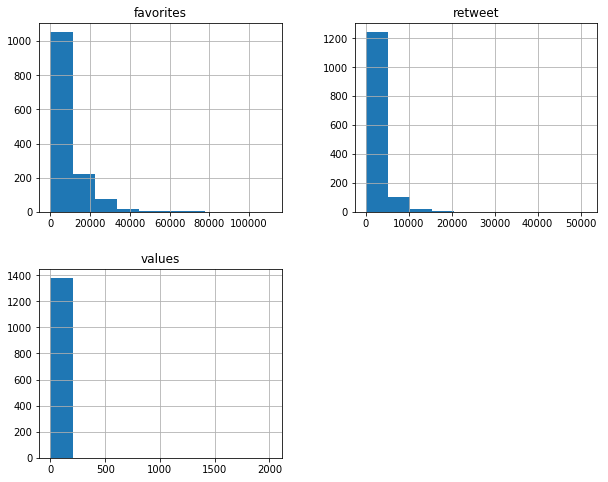

In [96]:
df_main.hist (figsize = [10,8]);

### Insights:

1.which group of dog is the most common?

2.relation between favorite tweets and retwweted.

3.retweets are made the most via...for group of dogs?

### Most common group of dogs

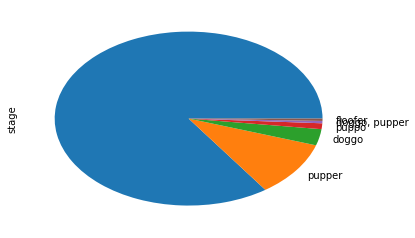

In [97]:
df_main['stage'].value_counts().plot(kind='pie')

in this graphic we can see that we have a majority of pupper stage.

### Relationship between the favorites tweets and retweet

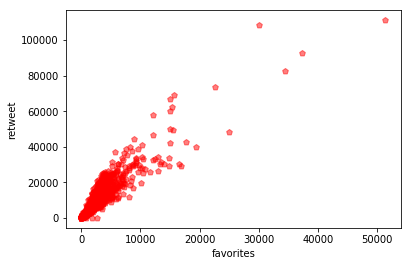

In [98]:
a=df_main.retweet
b=df_main.favorites
plt.scatter(a,b, c="r", alpha=0.5, marker='p',
            label='')
plt.xlabel("favorites")
plt.ylabel("retweet")
plt.show()

we see a proportional increasing between this two variables as much people likes the pic more likely they will retweet the tweet.

### Relation between Retweets and sharing form, for dogs types


In [99]:
df_main.describe()

,retweet,favorites,values
count,"1,381.0000","1,381.0000","1,387.0000"
mean,"2,269.4808","8,062.2368",16.3720
std,"3,314.6152","10,284.5586",91.1500
min,2.0000,0.0000,0.0000
25%,587.0000,"1,989.0000",10.0000
50%,"1,292.0000","4,239.0000",11.0000
75%,"2,717.0000","10,550.0000",12.0000
max,"51,373.0000","111,117.0000","2,015.0000"


In [100]:
#remove outliers numbers from the values column.
num=[]
for x in (df_main['values']):
    if x < 20:
        num.append(x)
    else:
        del(x)

In [101]:
df_main['values']=pd.Series(num)

In [102]:
df_main.head()

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,retweet,favorites,dogs_names,stage,values
0,892420643555336193,2017-08-01 16:23:56,Twitter iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"6,964.0000","33,674.0000",Phineas,,13.0000
1,892177421306343426,2017-08-01 00:17:27,Twitter iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"5,269.0000","29,214.0000",Tilly,,13.0000
2,891815181378084864,2017-07-31 00:18:03,Twitter iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"3,463.0000","21,963.0000",Archie,,12.0000
3,891689557279858688,2017-07-30 15:58:51,Twitter iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,"7,190.0000","36,768.0000",Darla,,13.0000
4,891327558926688256,2017-07-29 16:00:24,Twitter iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,"7,710.0000","35,161.0000",Franklin,,12.0000


In [103]:
df_main['source'].value_counts()

Twitter iphone        1308
Make a scene            52
Twitter web client      18
Tweet deck               9
Name: source, dtype: int64

In [104]:
df_main['source']=df_main['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter iphone','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Make a scene','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter web client','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'Tweet deck'})

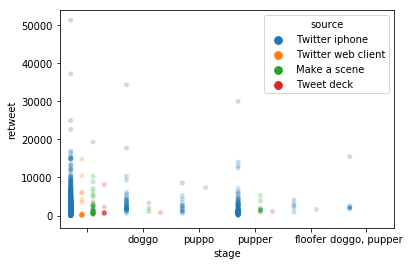

In [105]:
#Plotting the relation
sns.stripplot(x="stage", y="retweet", hue="source",
              data=df_main, dodge=True, alpha=.25, zorder=1)

we can see that for every dogs stage the most used form to retweet is the twitter app for iphone for every group of dogs,so we know that iphone users interact with the page more than others.

# Storing data

In [108]:
#Export to csv file
df_main.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')